In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l1
import random
import pydot
from IPython.display import SVG
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])


    return train_x, train_y, test_x, test_y

![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)

1) Load Dataset and normalize image vectors

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

print(Y_train_orig.shape)

(600,)


2) Sample a random image and print it

In [4]:
rand=random.randint(0,len(X_train_orig))

X_train_orig[rand].shape
#Y_train_orig

(64, 64, 3)

3) Build the model and fit it

In [5]:
model=Sequential()
model.add(Conv2D(32,(7,7),activation='relu',input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 58, 58, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dense (Dense)               (None, 2)                 53826     
                                                                 
Total params: 58690 (229.26 KB)
Trainable params: 58626 

4) Evaluate the model

In [7]:
batch_size = 64
epochs = 40
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])
history=model.fit(X_train_orig,Y_train_orig,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 2s 200ms/step - loss: 1.5640 - accuracy: 0.6792 - val_loss: 2.9422 - val_accuracy: 0.7417
Epoch 2/40
8/8 [==============================] - 1s 171ms/step - loss: 0.5846 - accuracy: 0.8396 - val_loss: 1.2982 - val_accuracy: 0.7917
Epoch 3/40
8/8 [==============================] - 2s 187ms/step - loss: 0.3875 - accuracy: 0.8896 - val_loss: 1.3573 - val_accuracy: 0.6667
Epoch 4/40
8/8 [==============================] - 1s 156ms/step - loss: 0.1677 - accuracy: 0.9375 - val_loss: 0.4090 - val_accuracy: 0.8500
Epoch 5/40
8/8 [==============================] - 1s 165ms/step - loss: 0.0981 - accuracy: 0.9604 - val_loss: 2.2930 - val_accuracy: 0.5667
Epoch 6/40
8/8 [==============================] - 1s 166ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 2.1231 - val_accuracy: 0.6167
Epoch 7/40
8/8 [==============================] - 1s 160ms/step - loss: 0.0408 - accuracy: 0.9896 - val_loss: 2.4162 - val_accuracy: 0.5333
Epoch 8/40
8/8 [====

5) Give the Confusion Matrix and the classification_report

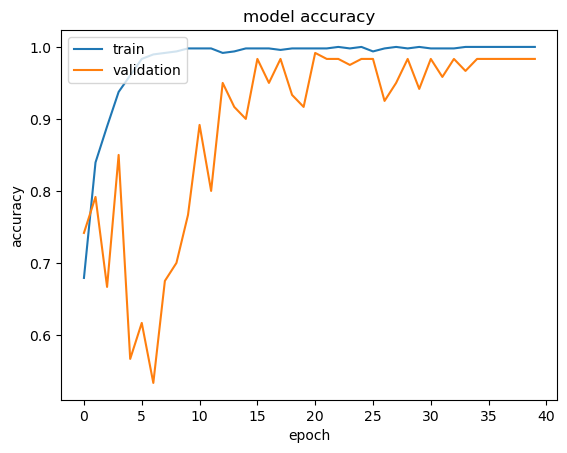

In [8]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
model_2=Sequential()
model_2.add(Conv2D(32,(7,7),activation='relu',input_shape=(64, 64, 3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(2,2))
model_2.add(Flatten())
model_2.add(Dense(2,activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 65538     
                                                                 
Total params: 70402 (275.01 KB)
Trainable params: 7033

In [10]:
batch_size = 32
epochs = 40
model_2.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [11]:
mycalls=[EarlyStopping(monitor="val_loss",patience=10)]

history_2=model_2.fit(X_train_orig,Y_train_orig,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=mycalls
                   )


Epoch 1/40
15/15 [==============================] - 2s 123ms/step - loss: 2.8035 - accuracy: 0.6750 - val_loss: 3.5583 - val_accuracy: 0.5833
Epoch 2/40
15/15 [==============================] - 2s 112ms/step - loss: 0.4577 - accuracy: 0.8750 - val_loss: 2.7936 - val_accuracy: 0.6167
Epoch 3/40
15/15 [==============================] - 2s 111ms/step - loss: 0.2349 - accuracy: 0.9125 - val_loss: 0.1170 - val_accuracy: 0.9500
Epoch 4/40
15/15 [==============================] - 2s 123ms/step - loss: 0.1304 - accuracy: 0.9479 - val_loss: 2.4045 - val_accuracy: 0.5167
Epoch 5/40
15/15 [==============================] - 2s 125ms/step - loss: 0.0709 - accuracy: 0.9833 - val_loss: 1.2323 - val_accuracy: 0.6333
Epoch 6/40
15/15 [==============================] - 2s 110ms/step - loss: 0.0595 - accuracy: 0.9792 - val_loss: 0.8249 - val_accuracy: 0.7750
Epoch 7/40
15/15 [==============================] - 2s 111ms/step - loss: 0.1090 - accuracy: 0.9604 - val_loss: 2.1037 - val_accuracy: 0.6583
Epoch 

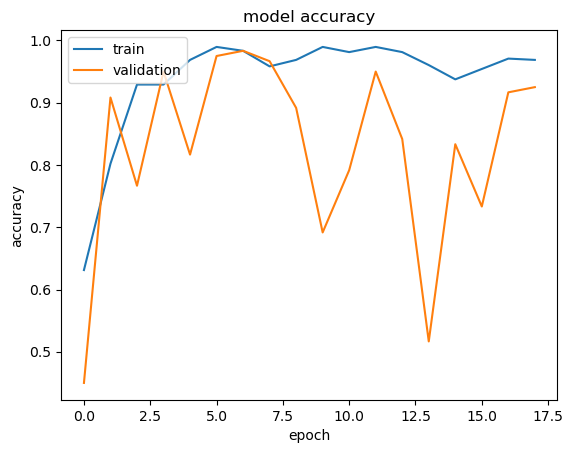

In [38]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.fit(X_train_orig)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])
hist=model.fit(train_datagen.flow(X_train_orig, Y_train_orig, batch_size=batch_size),
          epochs=epochs,         
          validation_data=train_datagen.flow(X_train_orig, Y_train_orig,
         batch_size=8))

Epoch 1/40
19/19 [==============================] - 3s 144ms/step - loss: 0.7992 - accuracy: 0.7033 - val_loss: 4.2505 - val_accuracy: 0.5000
Epoch 2/40
19/19 [==============================] - 3s 135ms/step - loss: 0.5274 - accuracy: 0.7817 - val_loss: 4.6086 - val_accuracy: 0.5000
Epoch 3/40
19/19 [==============================] - 3s 139ms/step - loss: 0.4021 - accuracy: 0.8350 - val_loss: 3.0040 - val_accuracy: 0.5000
Epoch 4/40
19/19 [==============================] - 3s 136ms/step - loss: 0.5753 - accuracy: 0.7533 - val_loss: 2.5605 - val_accuracy: 0.5000
Epoch 5/40
19/19 [==============================] - 3s 137ms/step - loss: 0.4291 - accuracy: 0.8150 - val_loss: 3.1145 - val_accuracy: 0.5000
Epoch 6/40
19/19 [==============================] - 3s 139ms/step - loss: 0.3388 - accuracy: 0.8583 - val_loss: 3.4043 - val_accuracy: 0.5000
Epoch 7/40
19/19 [==============================] - 3s 138ms/step - loss: 0.3705 - accuracy: 0.8483 - val_loss: 3.4033 - val_accuracy: 0.5000
Epoch 